# Preprocess test 

## For PENNA data analysis

### *.ini file implementation

#### version 1

created 8.August.2022

* want to automate tedious folder mapping via initialization and batch commands, if possible<br>
    * if a certain folder does not exist with what the user wants to write to, we make it automatically<br>
    
    
* want to implement all the hit finding and other -user input preprocessing parameters into an initialization folder<br>


In [10]:
import os, psutil
process = psutil.Process(os.getpid())
print(process.memory_info().rss)  # in bytes 

ModuleNotFoundError: No module named 'psutil'

In [2]:
%matplotlib widget
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
from h5py import File
from scipy.interpolate import interp1d
from os.path import exists

plt.style.use('dark_background')


In [3]:
ls /reg/d/psdm/tmo/tmoly7820/scratch/preproc/v7/

logs/                  run258_v7_KB.h5        run268_v7_KB_part0.h5
run245_v7_KB.h5        run258_v7_KB_part0.h5  run269_v7_KB.h5
run246_v7_KB.h5        run259_v7_KB.h5        run270_v7_KB.h5
run247_v7_KB.h5        run259_v7_KB_part0.h5  run271_v7_KB.h5
run248_v7_KB.h5        run260_v7_KB.h5        run272_v7_KB.h5
run249_v7_KB.h5        run260_v7_KB_part0.h5  run273_v7_KB.h5
run249_v7_KB_part0.h5  run261_v7_KB.h5        run274_v7_KB_part0.h5
run250_v7_KB.h5        run261_v7_KB_part0.h5  run275_v7_KB_part0.h5
run250_v7_KB_part0.h5  run262_v7_KB.h5        run276_v7_KB.h5
run251_v7_KB.h5        run262_v7_KB_part0.h5  run276_v7_KB_part0.h5
run251_v7_KB_part0.h5  run263_v7_KB.h5        run277_v7_KB.h5
run252_v7_KB.h5        run263_v7_KB_part0.h5  run277_v7_KB_part0.h5
run253_v7_KB.h5        run264_v7_KB.h5        run278_v7_KB.h5
run253_v7_KB_part0.h5  run264_v7_KB_part0.h5  run278_v7_KB_part0.h5
run254_v7_KB.h5        run265_v7_KB.h5        run279_v7_KB.h5
run254_v7_KB_part0.h5  run265_v7_K

In [4]:
runs_list = np.arange(245,273)

for run in runs_list:
    file_str =  "/reg/d/psdm/tmo/tmoly7820/scratch/preproc/v7/run%s_v7_KB.h5" % run
    if not exists(file_str):
         print('File for run %s doesnt exist' % run)


In [6]:

raw = File("/reg/d/psdm/tmo/tmoly7820/scratch/preproc/v7/run249_v7_KB.h5", 'r') 

order  = raw['timestamp'][:].argsort()


wf = np.array(raw['MBES_wf_inner'])[order,:]
wf_out = np.array(raw['MBES_wf_outer'])[order,:]
binary_wf = np.array(raw['binary_sig'])[order,:];

MBESslice_inner_t1 = np.array(raw['MBESslice_inner_t1'])
MBESslice_inner_t2 = np.array(raw['MBESslice_inner_t2'])

MBESslice_outer_t1 = np.array(raw['MBESslice_outer_t1'])
MBESslice_outer_t2 = np.array(raw['MBESslice_outer_t2'])

tof = np.linspace(MBESslice_inner_t1,MBESslice_inner_t2,np.shape(wf)[1],endpoint = True)
tof_out = np.linspace(MBESslice_outer_t1,MBESslice_outer_t2,np.shape(wf_out)[1],endpoint = True)


hf_CFD_t = np.array(raw['inner_t_CFD'])[order,:];
hf_FFT_t = np.array(raw['MBESpk_inner_t'])[order,:];
hf_sc_t = np.array(raw['inner_t_SciPy'])[order,:];
pulsEn = np.array(raw['xgmd_energy'])[order];
# for key in raw:
#     print(key)

In [7]:
np.shape(tof_out)

(5944,)

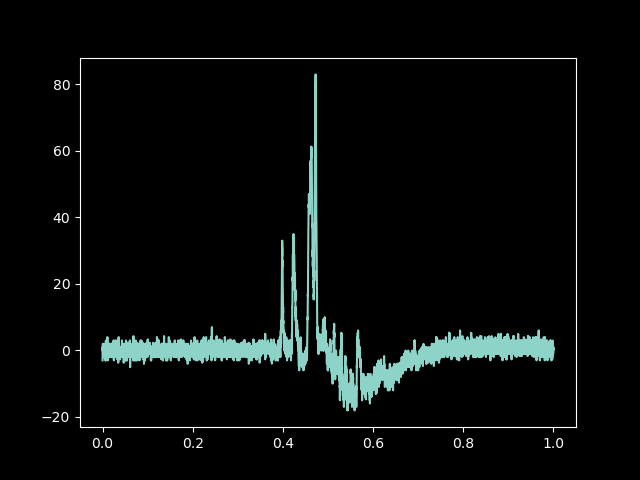

In [9]:
plt.figure()
plt.plot(tof_out,wf_out[0])

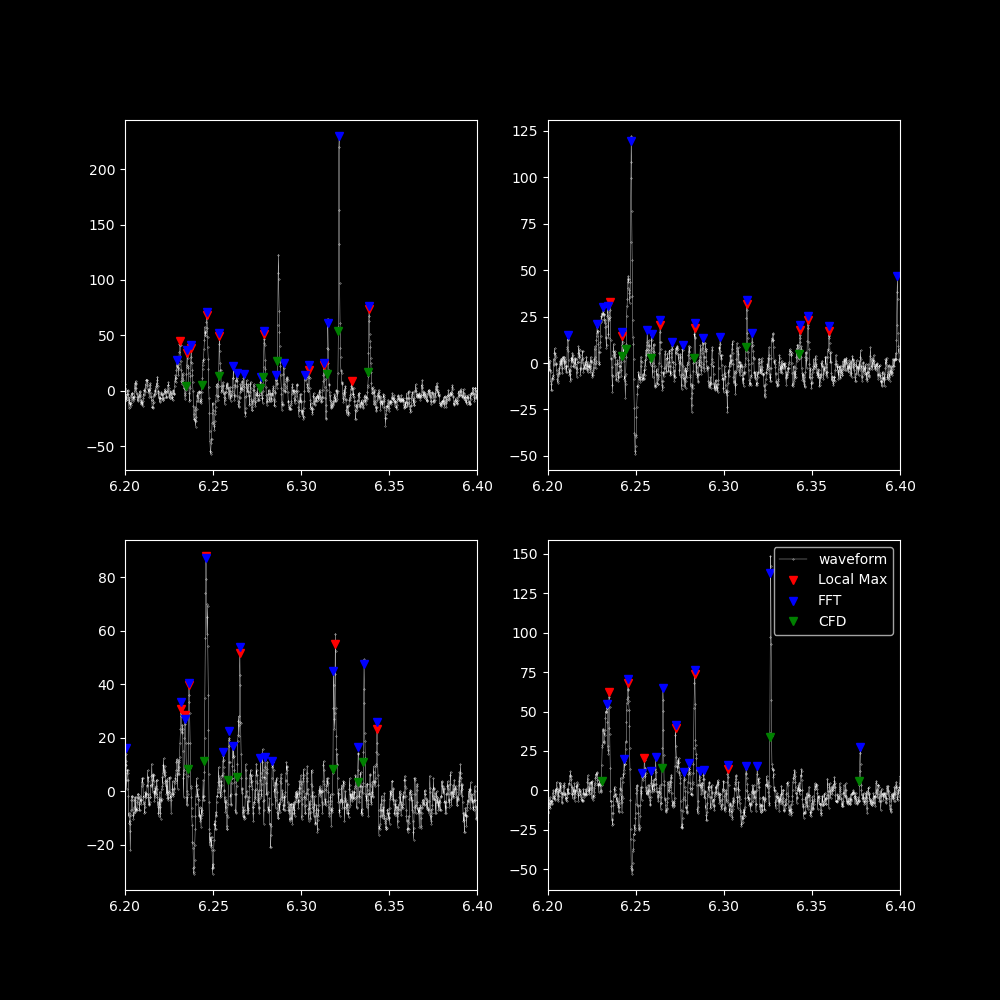

In [4]:


plt.figure(figsize = (10,10))

for index,shot in enumerate([0,10,50,100]):
    plt.subplot(2,2,index+1)
    wf_i = wf[shot]
    binary_wf_i = binary_wf[shot]



    tof = np.linspace(MBESslice_inner_t1,MBESslice_inner_t2,len(wf[0]),endpoint = True)

    wt_binary = tof[:-3]


    plt.plot(tof,wf_i,'.-',color = 'w',linewidth = 0.25,markersize = 0.5,label = 'waveform')
    # plt.plot(wt_binary,binary_wf_i,'.-',color = 'r')
    hf_CFD_i = hf_CFD_t[shot];
    hf_FFT_i = hf_FFT_t[shot];
    hf_sc_i = hf_sc_t[shot]

    f = interp1d(tof,wf_i);

    first = True
    for hf_tij in hf_sc_i[(tof[0]<=hf_sc_i)&(hf_sc_i<=tof[-1])]:
        if first:
            label_i = 'Local Max'  
            first = False
        else:
            label_i = '';

        plt.plot(hf_tij,f(hf_tij),'v',color = 'r',label = label_i)
        

    first = True
    for hf_tij in hf_FFT_i[(tof[0]<=hf_FFT_i)&(hf_FFT_i<=tof[-1])]:
        if first:
            label_i = 'FFT'  
            first = False
        else:
            label_i = '';
        plt.plot(hf_tij,f(hf_tij)+2.5,'v',color = 'b',label = label_i)
        
    first = True
    for hf_tij in hf_CFD_i[(tof[0]<=hf_CFD_i)&(hf_CFD_i<=tof[-1])]:
        if first:
            label_i = 'CFD'  
            first = False
        else:
            label_i = '';
        plt.plot(hf_tij,f(hf_tij),'v',color = 'g',label = label_i)
        


    # for hf_tij in hf_FFT_t[]
    plt.xlim([6.2,6.4])
plt.legend()


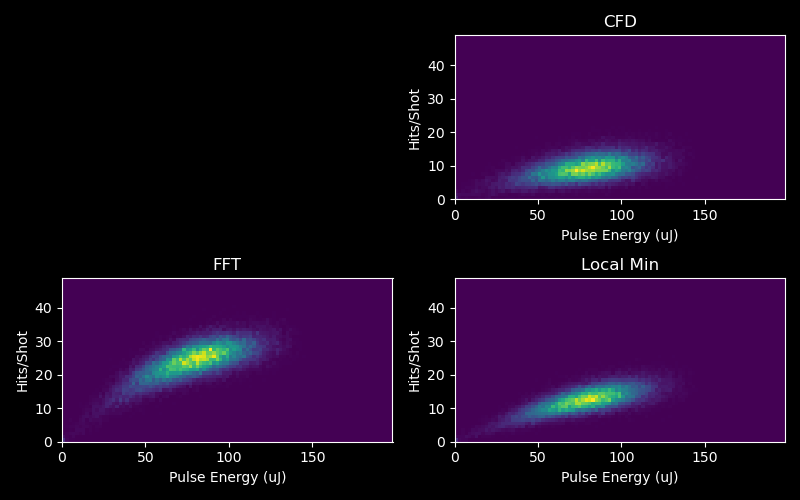

In [11]:
plt.figure(figsize = (8,5))

index=1;
for hf_index,label in zip([hf_CFD_t,hf_FFT_t,hf_sc_t],['CFD','FFT','Local Min']):
    plt.subplot(2,2,index+1)
    counts = np.sum((tof[0]<=hf_index)&(hf_index<=tof[-1]),1)
    plt.hist2d(pulsEn*1000,counts,[np.arange(0,200,2),np.arange(0,50)])
    plt.xlabel('Pulse Energy (uJ)'); plt.ylabel('Hits/Shot'); plt.title(label)
    index=index+1;
plt.tight_layout()